In [1]:
import math
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check for null values

In [7]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["Null_sum","null_ratio"])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Check for nuique values

In [8]:
pd.DataFrame([df.nunique(),df.dtypes],index=["unique_values","dtypes"])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
unique_values,124592,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,32767,2
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


### Reprsent column class as categorical

In [9]:
df["Class"]=df["Class"].astype("category")
# df.info()

### Check for duplicated

In [10]:
df.duplicated().sum()

1081

**drop duplicated**

In [11]:
df.drop_duplicates(inplace=True)
# check for duplicated
df.duplicated().sum()

0

## Statistics adout data

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [13]:
df.describe(include="category")

,Class
count,283726
unique,2
top,0
freq,283253


### visualization

In [14]:
numeric_df=df.select_dtypes("number")
# numeric_df

In [15]:
categorical_df=df.select_dtypes("category")
# categorical_df

## check for out liers

<function matplotlib.pyplot.show(close=None, block=None)>

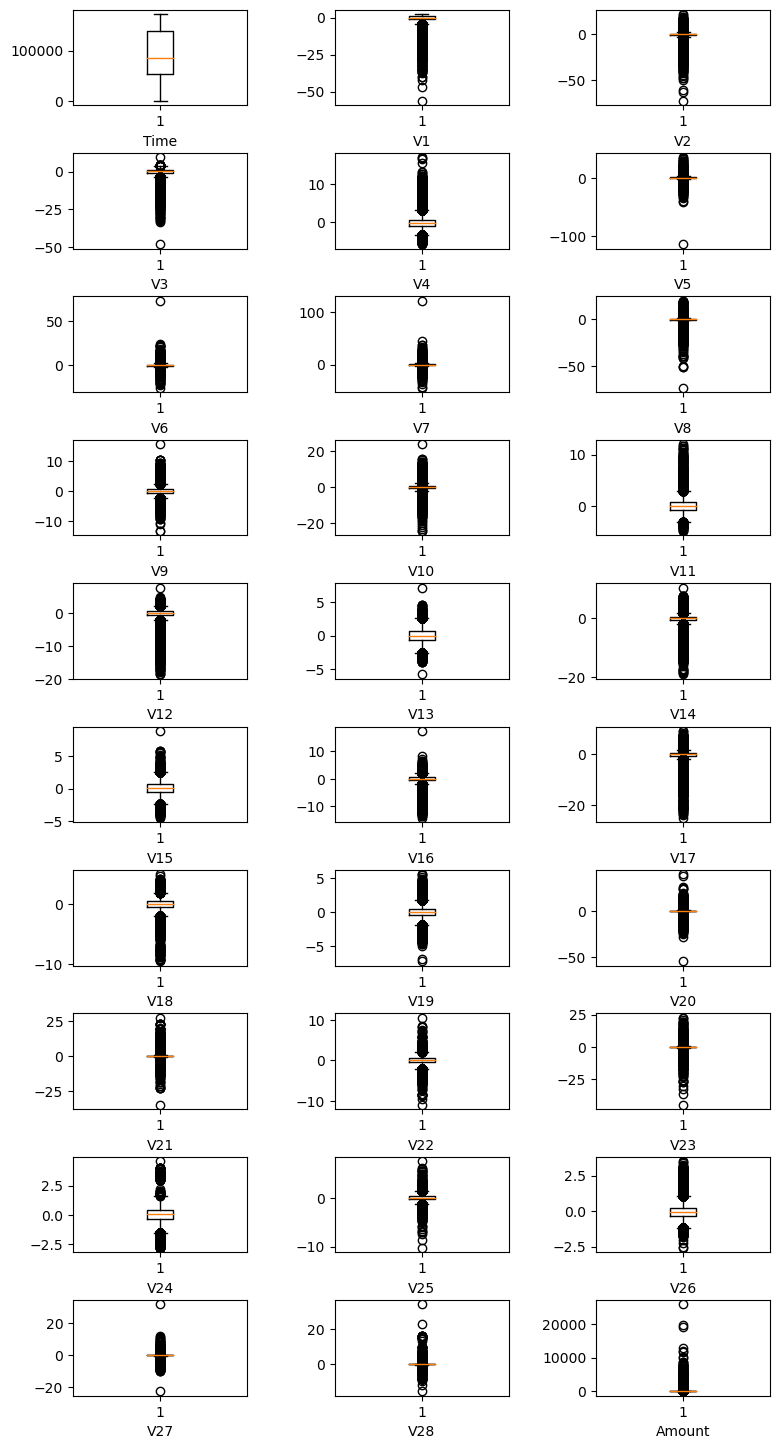

In [16]:
plt.figure(figsize=(9,18))
for i,col in enumerate (numeric_df):
    plt.subplot(10,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

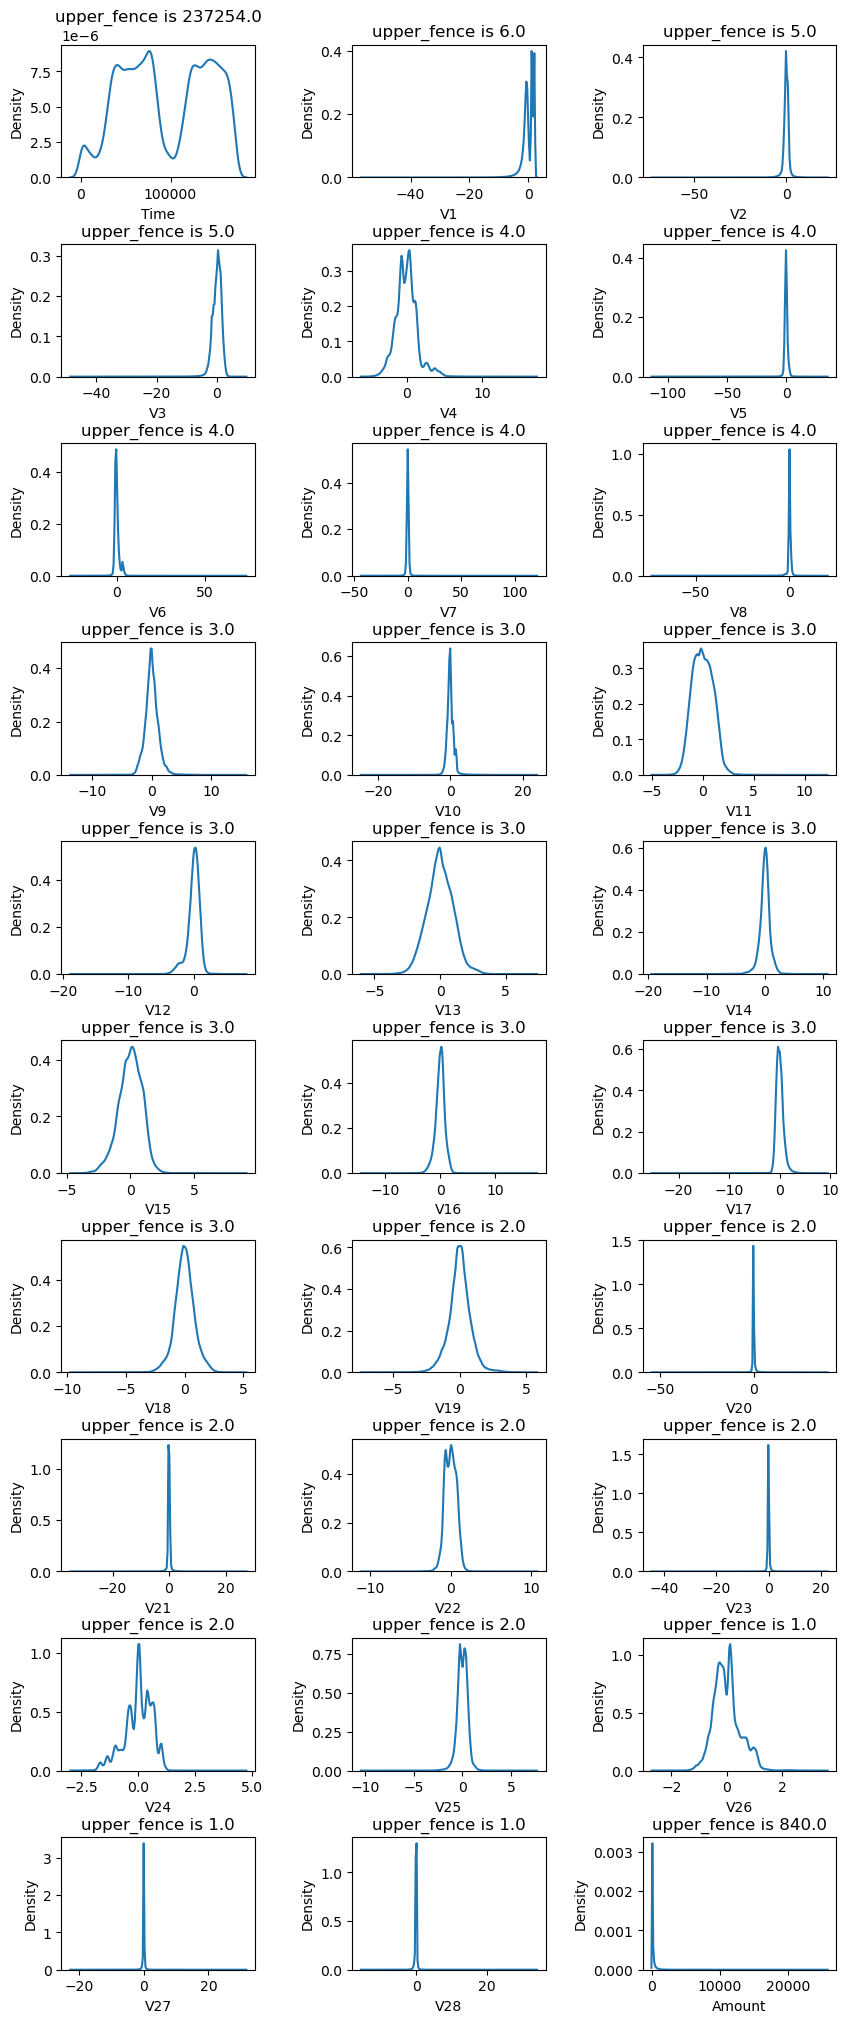

In [17]:
plt.figure(figsize=(10,25))
for i,col in enumerate(numeric_df):
    plt.subplot(10,3,i+1)
    sns.kdeplot(df[col])
    m=df[col].mean()
    s=df[col].std()
    upper_fence=m+3*s
    lower_fence=m-3*s
    plt.title(f"upper_fence is {np.round(upper_fence)}")
plt.subplots_adjust(hspace=.5,wspace=.5)
plt.show

### Replace outliers

In [18]:
for col in numeric_df :
    Q3=df[col].quantile(.75)
    Q1=df[col].quantile(.25)
    IQR=Q3-Q1
    
    upper_fence=Q3+1.5*IQR
    lower_fence=Q1-1.5*IQR
    
    upper_out = df[df[col] > upper_fence][col].values
    df[col].replace(upper_out, upper_fence, inplace=True)
    
    lower_out = df[df[col] < lower_fence][col].values
    df[col].replace(lower_out, lower_fence, inplace=True)
    
#     print(f"Upper fence of {col} is: {upper_fence}")
#     print(df[col].max())
#     print("------------")

<function matplotlib.pyplot.show(close=None, block=None)>

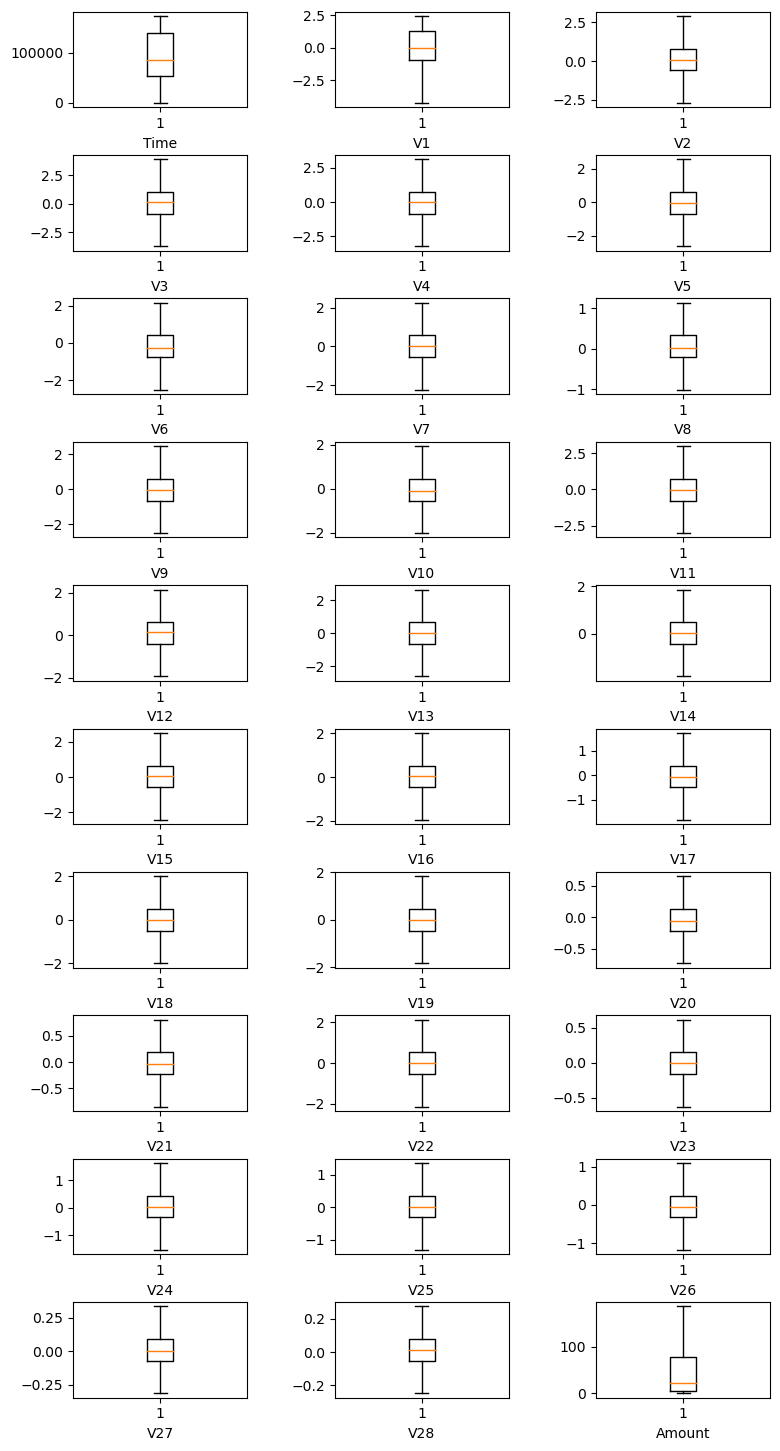

In [19]:
plt.figure(figsize=(9,18))
for i,col in enumerate (numeric_df):
    plt.subplot(10,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

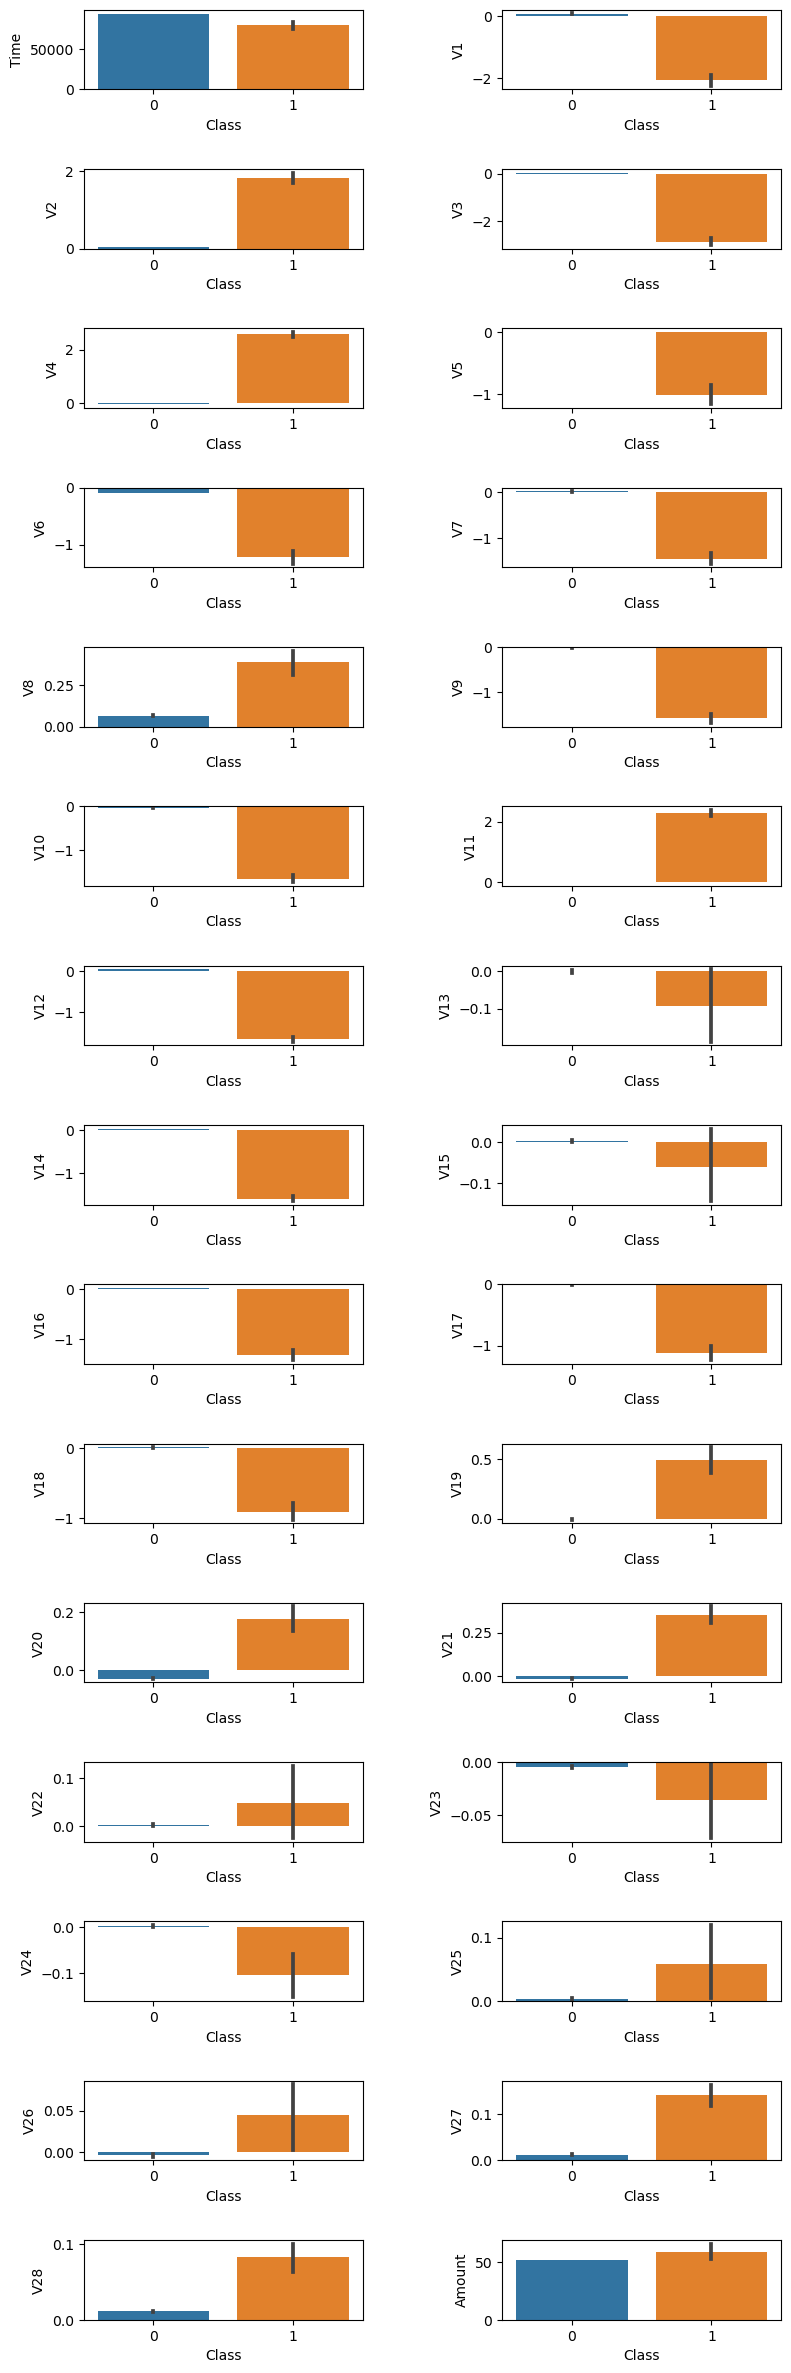

In [20]:
plt.figure(figsize=(9,30))
for i, col in enumerate(numeric_df):
    plt.subplot(15, 2, i+1)
    sns.barplot(x = df["Class"], y = df[col])
    plt.ylabel = col
    plt.xlabel("Class")
plt.subplots_adjust(hspace=1,wspace=.5)
plt.show()    


## Split data

In [28]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=14)

## Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=x_train.select_dtypes("number").columns
x_scaler=MinMaxScaler()
# y_scaler=MinMaxScaler()

x_train[numeric_cols]=x_scaler.fit_transform(x_train[numeric_cols])
# y_train[["Class"]]=y_scaler.fit_transform(y_train[["Class"]])

x_test[numeric_cols]=x_scaler.transform(x_test[numeric_cols])
# y_test[["Class"]]=y_scaler.transform(y_test[["class"]])

In [30]:
print(sum(df.Class==0))
print(sum(df.Class!=0))

283253
473


# ML using Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model= RandomForestClassifier(max_depth=5, random_state=0, n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [32]:
from sklearn.metrics import accuracy_score
tr_pred = model.predict(x_train)
test_pred = model.predict(x_test)

tr_acc = accuracy_score(y_train, tr_pred)
test_acc = accuracy_score(y_test, test_pred)

print(tr_acc)
print(test_acc)

0.999500252503998
0.9994339421125708


In [37]:
max_depth=np.arange(2,15)
# print(max_depth)
tr_errors = []
ts_errors = []
for md in max_depth:
    from sklearn.ensemble import RandomForestClassifier
    model= RandomForestClassifier(max_depth=md, random_state=0, n_estimators=100)
    model.fit(x_train,y_train)
    from sklearn.metrics import accuracy_score
    tr_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    tr_acc = accuracy_score(y_train, tr_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    tr_errors.append(tr_acc)
    ts_errors.append(test_acc)
print(tr_errors)
print(ts_errors)
    

[0.9988426900092585, 0.9992056645063547, 0.9993950425048397, 0.999500252503998, 0.9995738995034088, 0.9996212440030301, 0.9996475465028196, 0.9996843700025251, 0.9997317145021463, 0.9997737985018096, 0.9998632270010942, 0.999931613500547, 0.9999736975002104]
[0.9987504005126562, 0.9991776140126027, 0.9993484994125814, 0.9994339421125708, 0.9994553027875681, 0.9994873438000641, 0.9995087044750615, 0.9994980241375627, 0.9995621061625547, 0.9995727865000534, 0.9995727865000534, 0.9995621061625547, 0.9995834668375521]
